In [32]:
import logging
import os
import sys
from configparser import ConfigParser
import pandas as pd

gitpath=os.path.expanduser("~/git/mapseq-processing")
sys.path.append(gitpath)

gitpath=os.path.expanduser("~/git/cshlwork")
sys.path.append(gitpath)

from cshlwork.utils import JobRunner, JobStack, JobSet
# for processing initial fastq
from mapseq.core import get_default_config, load_sample_info, load_barcodes, process_fastq_pair, make_summaries
# for processing barcode-specific fasta files
from mapseq.core import make_counts_df, do_threshold, filter_barcodes, write_fasta_for_bowtie
# for bowtie
from alignment.bowtie import run_bowtie, make_bowtie_df, matrix_df_from_btdf
# Setup paths for analysis
cp = get_default_config()
sampleinfo = os.path.expanduser('~/project/mapseq/M205test/Mseq205_sampleinfo.xlsx')
barcodes = os.path.expanduser('~/project/mapseq/M205test/barcode_v2.txt')
outdir = os.path.expanduser('~/project/mapseq/M205testout')
infiles = [
    os.path.expanduser('~/project/mapseq/M205test/M205_HZ_S1_R1_001.fastq.gz'),
    os.path.expanduser('~/project/mapseq/M205test/M205_HZ_S1_R2_001.fastq.gz')
          ]
#logging.getLogger().setLevel(logging.DEBUG)   
logging.getLogger().setLevel(logging.INFO)
print("Done")

Done


In [33]:
sampdf = load_sample_info(cp, sampleinfo)
# extract list of actually used primers.
rtlist = list(sampdf.rtprimer.dropna())
#print(len(rtlist))
# make barcode handler objects
bcolist = load_barcodes(cp, barcodes, labels=rtlist, outdir=outdir)
print(len(bcolist))
sampdf = sampdf[sampdf['rtprimer'].notna()]
sampdf

26


,usertube,ourtube,samplename,siteinfo,rtprimer,brain,col_num
1,OB,1,Olfactory Bulb,NaN,1,YW143,1
2,ACB,2,ACB,NaN,2,YW143,2
3,AI,3,AI,NaN,3,YW143,3
4,CP,4,CP (dorsal part - can just dissect out the top...,NaN,4,YW143,4
5,MTN,5,MTN,NaN,5,YW143,5
6,BLAa,6,BLAa,NaN,6,YW143,6
7,PIR,7,Piriform Cortex,NaN,7,YW143,7
8,VTA,8,VTA,NaN,8,YW143,8
9,TeA,9,TeA,NaN,9,YW143,9
10,ENTl,10,ENTl,NaN,10,YW143,10


In [35]:
# handle all the input. usually takes ~25 minutes
recalc = False
missing = []
for bcnum in range(1,len(bcolist)  + 1):
    bcfile = os.path.expanduser(f'~/project/mapseq/M205testout/BC{bcnum}.fasta')
    if not ( os.path.exists(bcfile) and os.path.getsize(bcfile) > 1 ) :
        print(f'{bcfile} doesnt exist. Recalc = true')
        #process_fastq_pair(cp, infiles[0], infiles[1], bcolist, outdir=outdir)
        missing.append(bcnum)
        recalc = True
    else:
        print(f'Non-empty BC{bcnum}.fasta exists.')
if recalc:
    print(f'missing BCs: {missing}')
    process_fastq_pair(cp, infiles[0], infiles[1], bcolist, outdir=outdir)
!ls ~/project/mapseq/M205testout/

No BC1.fasta exists. Calculating
No BC2.fasta exists. Calculating
No BC3.fasta exists. Calculating
No BC4.fasta exists. Calculating
No BC5.fasta exists. Calculating
No BC6.fasta exists. Calculating
No BC7.fasta exists. Calculating
No BC8.fasta exists. Calculating
No BC9.fasta exists. Calculating
No BC10.fasta exists. Calculating
No BC11.fasta exists. Calculating
No BC12.fasta exists. Calculating
No BC13.fasta exists. Calculating
No BC14.fasta exists. Calculating
No BC15.fasta exists. Calculating
No BC16.fasta exists. Calculating
No BC17.fasta exists. Calculating
No BC18.fasta exists. Calculating
No BC19.fasta exists. Calculating
No BC20.fasta exists. Calculating
No BC21.fasta exists. Calculating
No BC22.fasta exists. Calculating
No BC23.fasta exists. Calculating
No BC24.fasta exists. Calculating
No BC25.fasta exists. Calculating
No BC26.fasta exists. Calculating
missing BCs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


2023-02-21 13:31:09,965 (UTC) [ INFO ] core.py:313 root.process_fastq_pair(): handled 1000000 reads. matched=12455 unmatched=987545
2023-02-21 13:32:41,443 (UTC) [ INFO ] core.py:313 root.process_fastq_pair(): handled 2000000 reads. matched=24883 unmatched=1975117
2023-02-21 13:34:11,680 (UTC) [ INFO ] core.py:313 root.process_fastq_pair(): handled 3000000 reads. matched=37377 unmatched=2962623
2023-02-21 13:35:40,404 (UTC) [ INFO ] core.py:313 root.process_fastq_pair(): handled 4000000 reads. matched=49790 unmatched=3950210
2023-02-21 13:37:08,645 (UTC) [ INFO ] core.py:313 root.process_fastq_pair(): handled 5000000 reads. matched=62201 unmatched=4937799
2023-02-21 13:38:36,847 (UTC) [ INFO ] core.py:313 root.process_fastq_pair(): handled 6000000 reads. matched=74843 unmatched=5925157
2023-02-21 13:40:04,775 (UTC) [ INFO ] core.py:313 root.process_fastq_pair(): handled 7000000 reads. matched=87214 unmatched=6912786
2023-02-21 13:41:33,662 (UTC) [ INFO ] core.py:313 root.process_fastq_

BC1.counts.tsv  BC14.fasta      BC2.counts.tsv  BC24.fasta      BC6.counts.tsv
BC1.fasta       BC15.counts.tsv BC2.fasta       BC25.counts.tsv BC6.fasta
BC10.counts.tsv BC15.fasta      BC20.counts.tsv BC25.fasta      BC7.counts.tsv
BC10.fasta      BC16.counts.tsv BC20.fasta      BC26.counts.tsv BC7.fasta
BC11.counts.tsv BC16.fasta      BC21.counts.tsv BC26.fasta      BC8.counts.tsv
BC11.fasta      BC17.counts.tsv BC21.fasta      BC3.counts.tsv  BC8.fasta
BC12.counts.tsv BC17.fasta      BC22.counts.tsv BC3.fasta       BC9.counts.tsv
BC12.fasta      BC18.counts.tsv BC22.fasta      BC4.counts.tsv  BC9.fasta
BC13.counts.tsv BC18.fasta      BC23.counts.tsv BC4.fasta       paired.txt
BC13.fasta      BC19.counts.tsv BC23.fasta      BC5.counts.tsv  unmatched.fasta
BC14.counts.tsv BC19.fasta      BC24.counts.tsv BC5.fasta


In [31]:
#process_bcfasta(cp, bc1file)
bdflist = []

alldf = pd.DataFrame({'bc_index': pd.Series(dtype='str'),
                   'sequence': pd.Series(dtype='str'),
                   'counts': pd.Series(dtype='int')})
for bcnum in range(1, len(bcolist) + 1):
#for bcnum in ['6','7']:
    bcfile = os.path.expanduser(f'~/project/mapseq/M205testout/BC{bcnum}.fasta')
    filepath = os.path.abspath(bcfile)    
    dirname = os.path.dirname(filepath)
    filename = os.path.basename(filepath)
    (base, ext) = os.path.splitext(filename)
    logging.getLogger().setLevel(logging.INFO)   
    cdf = make_counts_df(cp, bcfile)
    cdf['logcounts'] = np.log(cdf.counts)
    cdf['bc_index'] = bcnum       
    of = os.path.join(dirname , f'{base}.counts.tsv')
    cdf.to_csv(of, sep='\t')
    alldf = pd.concat([alldf, cdf], ignore_index = True, copy=False)
    #!ls ~/project/mapseq/M205testout/BC* | head -5
    #sdf = cdf[cdf.counts > 2]
alldf

2023-02-20 17:09:31,378 (UTC) [ INFO ] core.py:115 root.make_counts_df(): kept 8852 non-'N' sequences out of 8852
2023-02-20 17:09:31,510 (UTC) [ INFO ] core.py:115 root.make_counts_df(): kept 9538 non-'N' sequences out of 9538
2023-02-20 17:09:31,617 (UTC) [ INFO ] core.py:115 root.make_counts_df(): kept 7646 non-'N' sequences out of 7646
2023-02-20 17:09:31,679 (UTC) [ INFO ] core.py:115 root.make_counts_df(): kept 3963 non-'N' sequences out of 3963
2023-02-20 17:09:31,730 (UTC) [ INFO ] core.py:115 root.make_counts_df(): kept 3085 non-'N' sequences out of 3085
2023-02-20 17:09:32,088 (UTC) [ INFO ] core.py:115 root.make_counts_df(): kept 27220 non-'N' sequences out of 27220
2023-02-20 17:09:32,129 (UTC) [ INFO ] core.py:115 root.make_counts_df(): kept 1742 non-'N' sequences out of 1742
2023-02-20 17:09:32,175 (UTC) [ INFO ] core.py:115 root.make_counts_df(): kept 2756 non-'N' sequences out of 2756
2023-02-20 17:09:32,308 (UTC) [ INFO ] core.py:115 root.make_counts_df(): kept 9514 no

,bc_index,sequence,counts,logcounts
0,1,CTACAGGTTCTTATGAGGACGGGACTTGTGTCCTACAGGTTCTT,4431,8.396381
1,1,AAAATAACCACTTTCGATCTCTATGAGGACTTAAAATAACCACT,691,6.538140
2,1,ATAGCGGGCCACATGAGGACAGGAGCCCGGCTATAGCGGGCCAC,448,6.104793
3,1,CTGCTCCAAGAGATGAGGACGTTCCGCACATCCTGCTCCAAGAG,387,5.958425
4,1,CTCTTACAGTTTATTCGCTCATGAGGACGCAACTCTTACAGTTT,246,5.505332
...,...,...,...,...
9357,26,TTAGGCACTAAGTCAGTATGTCTCTTAGGGCTTTAGGCACTAAG,1,0.000000
9358,26,GCATTCTTTAGGCAGAGTGTCGCGGCCCGGGAGCATTCTTTAGG,1,0.000000
9359,26,AAATGGCTTTACTTTAGGCAAAAGTCCGTGTCAAATGGCTTTAC,1,0.000000
9360,26,TTTAGGCATTCTAGTAATGTCACAAAGTCCGATTTAGGCATTCT,1,0.000000


array([[<AxesSubplot: title={'center': 'logcounts'}>]], dtype=object)

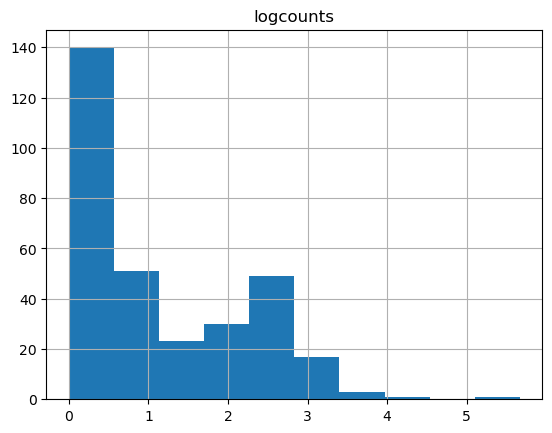

In [134]:
# 
tdf = do_threshold(cp, cdf)
tdf

/Users/jhover/git/mapseq-processing/mapseq/core.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sequence'] = df.sequence.str[:spend]


,sequence,counts
0,CAATGTGGACGGTAAATTGGTTTTATGGTGCC,3988
1,TATTTATGGTCAGATGTGCATGGTTCACGTTT,702
2,AGGGAATCCCTAAGTCTTTATGGTCAAGTTTC,649
3,ATTTATGGTTATTTTTATGTGTATTTTCTTTT,649
4,CTTTATGGTTCAATCTGAACCCTCCCAGCTTT,455
...,...,...
416,GAATCCTTCTGTTTATGGTTTAATATTTACTC,3
417,TATGGTAGGGAGTGGTTGGATGCTCCACCATT,3
418,TTCTTGTGGGCTTCAATTGGACATTTATGGTT,3
419,TTGCATGAATGTTTATGGTGTTTATGCTTTTC,3


In [135]:
bcdf = filter_barcodes(cp, tdf)
bcdf

,sequence,counts
0,CAATGTGGACGGTAAATTGGTTTTATGGTGCC,3988
1,TATTTATGGTCAGATGTGCATGGTTCACGTTT,702
2,AGGGAATCCCTAAGTCTTTATGGTCAAGTTTC,649
3,ATTTATGGTTATTTTTATGTGTATTTTCTTTT,649
4,CTTTATGGTTCAATCTGAACCCTCCCAGCTTT,455
...,...,...
416,GAATCCTTCTGTTTATGGTTTAATATTTACTC,3
417,TATGGTAGGGAGTGGTTGGATGCTCCACCATT,3
418,TTCTTGTGGGCTTCAATTGGACATTTATGGTT,3
419,TTGCATGAATGTTTATGGTGTTTATGCTTTTC,3


In [139]:
bctool = cp.get('bcfasta','tool')
of = os.path.join(dirname , f'{base}.bc.seq.fasta')
seqfasta = write_fasta_for_bowtie(cp, bcdf, outfile=of)
seqfasta

2022-12-13 16:59:55,145 (UTC) [ INFO ] utils.py:615 root.dataframe_to_seqlist(): made list of 216 SeqRecords


'/Users/jhover/project/mapseq/M205testout/BC6.bc.seq.fasta'

In [140]:
# run bowtie on sequence set. 
of = os.path.join(dirname , f'{base}.bc.seq.{bctool}')
afile = run_bowtie(cp, seqfasta, of, tool=bctool )
afile

2022-12-13 16:59:59,747 (UTC) [ INFO ] bowtie.py:35 root.run_bowtie(): running allxall bowtie on /Users/jhover/project/mapseq/M205testout/BC6.bc.seq.fasta -> /Users/jhover/project/mapseq/M205testout/BC6.bc.seq.bowtie
2022-12-13 16:59:59,915 (UTC) [ INFO ] bowtie.py:67 root.run_bowtie(): bowtie-build done.
2022-12-13 17:00:00,117 (UTC) [ INFO ] bowtie.py:103 root.run_bowtie(): bowtie done.


'/Users/jhover/project/mapseq/M205testout/BC6.bc.seq.bowtie'

In [141]:
btdf = make_bowtie_df(afile)
btdf

,name_read,strand,name_align,offset,seq,quals,ceil,mm_desc
0,0,+,0,0,CAATGTGGACGGTAAATTGGTTTTATGGTGCC,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,0,NaN
1,0,+,282,0,CAATGTGGACGGTAAATTGGTTTTATGGTGCC,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,0,29:A>G
2,0,+,299,0,CAATGTGGACGGTAAATTGGTTTTATGGTGCC,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,0,20:G>T
3,0,+,399,0,CAATGTGGACGGTAAATTGGTTTTATGGTGCC,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,0,7:T>G
4,0,+,398,0,CAATGTGGACGGTAAATTGGTTTTATGGTGCC,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,0,7:A>G
...,...,...,...,...,...,...,...,...
235,416,+,416,0,GAATCCTTCTGTTTATGGTTTAATATTTACTC,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,0,NaN
236,417,+,417,0,TATGGTAGGGAGTGGTTGGATGCTCCACCATT,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,0,NaN
237,418,+,418,0,TTCTTGTGGGCTTCAATTGGACATTTATGGTT,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,0,NaN
238,419,+,419,0,TTGCATGAATGTTTATGGTGTTTATGCTTTTC,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,0,NaN


In [145]:
labels = np.unique(btdf[['name_read','name_align']])
labels
sdf = btdf.filter( ['name_read','name_align'], axis=1   )
sdf['val'] = True
sdf
mdf = sdf.pivot(index = 'name_read', 
                columns='name_align', 
                values='val').reindex(columns=labels, index=labels, fill_value=False)
mdf
mdf.sum()


name_align
0      5
1      1
2      1
3      2
4      1
      ..
416    1
417    1
418    1
419    1
420    1
Length: 216, dtype: object